<h1><center><font size=7>Sentiment Analysis</center></font></h1>

<br/>
<font color="darkblue" size="5">Project Overview</font>

Sentiment Analysis is a data science project that involves the use of machine
learning techniques to analyze and classify textual data based on the sentiment
expressed. The project aims to build a predictive model capable of determining
whether a given text conveys positive, negative, or neutral sentiment.

<br/>
<font color="darkblue" size="5">Project Objectives</font>

1. Data Exploration:
- Explore the Sentiment Analysis dataset to understand its structure, features,
and size.
- Identify key variables such as text content and sentiment labels.

2. Data Preprocessing:
- Perform text preprocessing tasks, including lowercasing, removing stop
words, and handling special characters.
- Tokenize and lemmatize words to prepare the text for sentiment analysis.

3. Exploratory Data Analysis (EDA):
- Conduct exploratory data analysis to gain insights into the distribution of
sentiment labels.
- Visualize the distribution using histograms or pie charts to understand the
balance of sentiment classes.



4. Text Vectorization:
- Convert the preprocessed text into numerical vectors using techniques like
TF-IDF (Term Frequency-Inverse Document Frequency) or word embeddings.
- Choose an appropriate vectorization method based on the characteristics of the
dataset.

5. Model Selection:
- Explore and implement different machine learning models suitable for text
classification, such as Naive Bayes, Support Vector Machines, or deep learning
models like LSTM (Long Short-Term Memory) networks.
- Evaluate the performance of each model using metrics like accuracy, precision,
recall, and F1 score.

6. Hyperparameter Tuning:
- Fine-tune the hyperparameters of the selected model to optimize its
performance.
- Utilize techniques like grid search or random search for hyperparameter
optimization.

7. Cross-Validation:
- Implement cross-validation techniques to assess the generalization
performance of the model and prevent overfitting.

8. Model Interpretability:
- Interpret the model's predictions by analyzing feature importance or using
techniques like LIME (Local Interpretable Model-agnostic Explanations).
- Understand which words or features contribute most to sentiment predictions.

9. Evaluation Metrics:
- Evaluate the model's performance using relevant evaluation metrics for
sentiment analysis, such as confusion matrix, precision-recall curves, and
ROC-AUC.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from sklearn.utils import resample
from sklearn.svm import  LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer as tf
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve
from string import punctuation
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.calibration import CalibratedClassifierCV
import nltk

# Download punkt data
nltk.download('punkt')

import warnings 
warnings.filterwarnings("ignore")


[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [4]:
import pandas as pd
import zipfile
import os

# Path to the zip file
zip_file_path = 'C:\\Users\\ADMIN\\Downloads\\archive (7).zip'

# Directory to extract the files
extracted_dir = 'C:\\Users\\ADMIN\\Downloads\\extracted_files\\'

# Create the extraction directory if it doesn't exist
os.makedirs(extracted_dir, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# List all CSV files in the extracted directory
csv_files = [f for f in os.listdir(extracted_dir) if f.endswith('.csv')]

# Combine the CSV files into a single DataFrame
dfs = []
for csv_file in csv_files:
    file_path = os.path.join(extracted_dir, csv_file)
    df = pd.read_csv(file_path, encoding='latin-1')  # Adjust encoding if needed
    dfs.append(df)

# Concatenate the DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
print(combined_df)

# Optionally, you can save the combined DataFrame to a new CSV file
combined_df.to_csv('C:\\Users\\ADMIN\\Downloads\\combined_data.csv', index=False)

             textID                                               text  \
0        f87dea47db  Last session of the day  http://twitpic.com/67ezh   
1        96d74cb729   Shanghai is also really exciting (precisely -...   
2        eee518ae67  Recession hit Veronique Branquinho, she has to...   
3        01082688c6                                        happy bday!   
4        33987a8ee5             http://twitpic.com/4w75p - I like it!!   
...             ...                                                ...   
1081378         NaN                                                NaN   
1081379         NaN                                                NaN   
1081380         NaN                                                NaN   
1081381         NaN                                                NaN   
1081382         NaN                                                NaN   

        sentiment Time of Tweet Age of User      Country  Population -2020  \
0         neutral       morning  

In [5]:
# Assuming df is your DataFrame with the assigned column names
df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

# Extract only the specified columns
selected_columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']
extracted_df = df[selected_columns]

# Display the extracted DataFrame
print(extracted_df)

         sentiment          id                          date     query  \
0                0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1                0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2                0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3                0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4                0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
...            ...         ...                           ...       ...   
1048567          4  1960186342  Fri May 29 07:33:44 PDT 2009  NO_QUERY   
1048568          4  1960186409  Fri May 29 07:33:43 PDT 2009  NO_QUERY   
1048569          4  1960186429  Fri May 29 07:33:44 PDT 2009  NO_QUERY   
1048570          4  1960186445  Fri May 29 07:33:44 PDT 2009  NO_QUERY   
1048571          4  1960186607  Fri May 29 07:33:45 PDT 2009  NO_QUERY   

                    user                                               text  
0          scotthamilton  is upse

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1048572 non-null  int64 
 1   id         1048572 non-null  int64 
 2   date       1048572 non-null  object
 3   query      1048572 non-null  object
 4   user       1048572 non-null  object
 5   text       1048572 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [7]:
df.describe()

,sentiment,id
count,1.048572e+06,1.048572e+06
mean,9.482458e-01,1.976168e+09
std,1.701122e+00,2.300567e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.824526e+09
50%,0.000000e+00,1.990870e+09
75%,0.000000e+00,2.198903e+09
max,4.000000e+00,2.329206e+09


In [8]:
df.isnull().sum()

sentiment    0
id           0
date         0
query        0
user         0
text         0
dtype: int64

In [9]:
df['sentiment'] = df['sentiment'].replace({4:1})

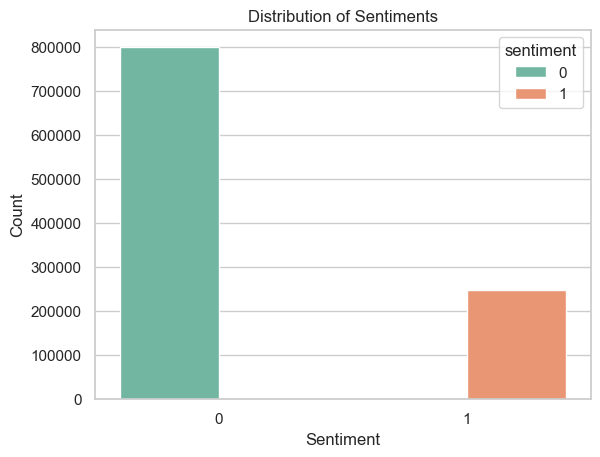

In [10]:
sns.set(style="whitegrid") 

sns.countplot(data=df, x='sentiment', hue='sentiment', palette='Set2')

# Customize plot labels and title if needed
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Show the plot
plt.show()

In [11]:
df['text'].isnull().sum()

0

In [12]:
df = df.drop_duplicates('text')

## Preprocessing

In [13]:
stuff_to_be_removed = list(punctuation)





def textprocessing(text):
    text = str(text)
    text = text.lower()                                                          # converting all uppercase letters to lowercase
    text = re.sub(r"https\S+|www\S+|https\S+"," ",text,flags=re.MULTILINE)       # removing all links from dataset
    text=re.sub("(\\d|\\W)+"," ",text)       
    text = re.sub(r'\@\w+|\#'," ",text)                                          # removing # and @ symbols from dataset
    text = re.sub(r'[^\w\s\`]'," ",text)                                         # removing other symbols like ^ except '
    text_tokens = word_tokenize(text) 
    lem = SnowballStemmer("english")
    text = [lem.stem(word) for word in text_tokens if not word in stuff_to_be_removed] 
    text1 = " ".join(text)
    
    return text1 

In [14]:
data_cleaned = pd.DataFrame()
df['text'] = df['text'].apply(textprocessing)
df['text'].head()

0    is upset that he can t updat his facebook by t...
1    kenichan i dive mani time for the ball manag t...
2         my whole bodi feel itchi and like it on fire
3    nationwideclass no it s not behav at all i m m...
4                          kwesidei not the whole crew
Name: text, dtype: object

In [15]:
negative_text = ' '.join(df[df['sentiment'] == 0]['text'])
positive_text = ' '.join(df[df['sentiment'] == 1]['text'])
df = df[['sentiment','text']]
df.head()

,sentiment,text
0,0,is upset that he can t updat his facebook by t...
1,0,kenichan i dive mani time for the ball manag t...
2,0,my whole bodi feel itchi and like it on fire
3,0,nationwideclass no it s not behav at all i m m...
4,0,kwesidei not the whole crew


## Visualizations

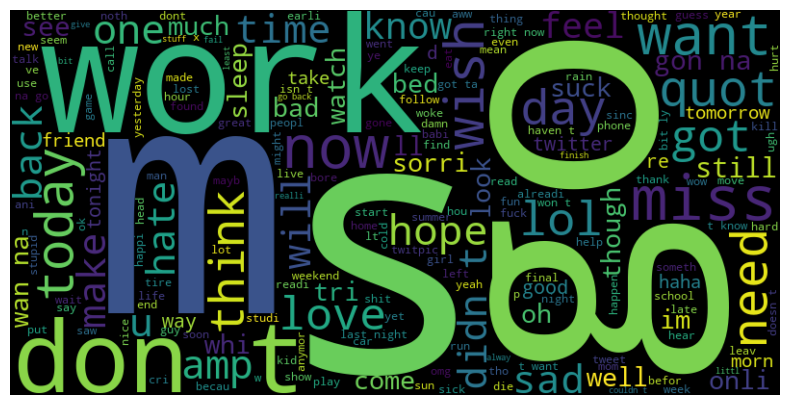

In [16]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

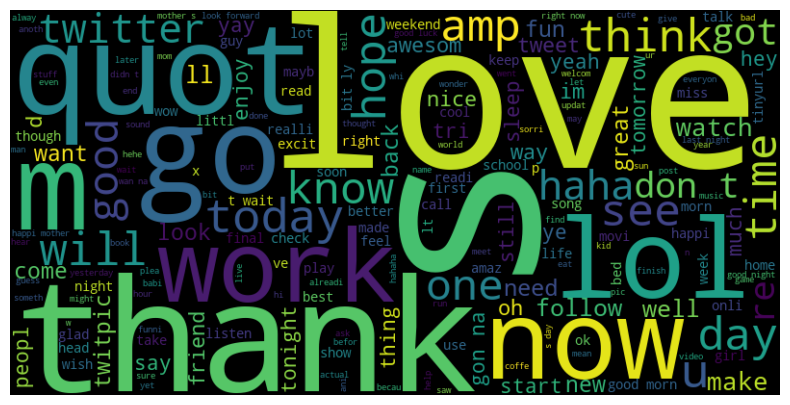

In [17]:
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Feature Scaling

In [18]:
x = df['text']
y = df['sentiment']

In [19]:
vectorizer = tf()
vectors = vectorizer.fit_transform(x)

In [20]:
X_train_svm, X_temp_svm, y_train_svm, y_temp_svm = train_test_split(vectors, y, test_size=0.3, random_state=52)

X_validation_svm, X_test_svm, y_validation_svm, y_test_svm = train_test_split(X_temp_svm, y_temp_svm, test_size=0.5, random_state=52)

## SVM with PCA

In [21]:
n_components = 100  
svd = TruncatedSVD(n_components=n_components)
X_train_svm_pca = svd.fit_transform(X_train_svm)
X_validation_svm_pca = svd.transform(X_validation_svm)
X_test_svm_pca = svd.transform(X_test_svm)

In [22]:
svm_model = LinearSVC(dual = True)
svm_model.fit(X_train_svm_pca, y_train_svm)

LinearSVC()

In [23]:
y_pred_validation_svm = svm_model.predict(X_validation_svm_pca)
accuracy_validation_svm = accuracy_score(y_validation_svm, y_pred_validation_svm)
print(f"Accuracy on the validation set: {accuracy_validation_svm}")


y_pred_test_svm = svm_model.predict(X_test_svm_pca)
accuracy_test_svm = accuracy_score(y_test_svm, y_pred_test_svm)
print(f"Accuracy on the test set: {accuracy_test_svm}")

Accuracy on the validation set: 0.7906961780980569
Accuracy on the test set: 0.7916226997812379


## SVM without PCA

In [24]:
classifier = CalibratedClassifierCV(LinearSVC(dual = True), method='sigmoid')
classifier.fit(X_train_svm, y_train_svm)

CalibratedClassifierCV(estimator=LinearSVC())

In [25]:
svm_predictions_train = classifier.predict(X_train_svm)

accuracy = accuracy_score(y_train_svm, svm_predictions_train)
print(f"Accuracy: {accuracy:.2f}")


print("Classification Report:")
print(classification_report(y_train_svm, svm_predictions_train))

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94    553132
           1       0.90      0.72      0.80    172160

    accuracy                           0.91    725292
   macro avg       0.91      0.84      0.87    725292
weighted avg       0.91      0.91      0.91    725292



In [26]:
svm_prediction_test = classifier.predict(X_test_svm)


accuracy = accuracy_score(y_test_svm, svm_prediction_test)
print(f"Accuracy: {accuracy:.2f}")


print("Classification Report:")
print(classification_report(y_test_svm, svm_prediction_test))

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90    118493
           1       0.75      0.53      0.62     36927

    accuracy                           0.85    155420
   macro avg       0.81      0.74      0.76    155420
weighted avg       0.84      0.85      0.84    155420



In [27]:
svm_predictions_validation= classifier.predict(X_validation_svm)

accuracy = accuracy_score(y_validation_svm, svm_predictions_validation)
print(f"Accuracy: {accuracy:.2f}")


print("Classification Report:")
print(classification_report(y_validation_svm, svm_predictions_validation))

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.90    118556
           1       0.75      0.53      0.62     36864

    accuracy                           0.85    155420
   macro avg       0.81      0.74      0.76    155420
weighted avg       0.84      0.85      0.84    155420



## Downsampling

In [28]:
## majority class 0
df_majority_knn = df[df['sentiment']==0]
## minority class 1
df_minority_knn = df[df['sentiment']==1]

df_majority_downsampled_knn = resample(df_majority_knn, 
                                 replace=False,   
                                 n_samples=len(df_minority_knn)//5,    
                                 random_state=134)

df_minority_downsampled_knn = resample(df_minority_knn, 
                                 replace=False,   
                                 n_samples=len(df_minority_knn)//5,    
                                 random_state=134)

In [29]:
df = pd.concat([df_majority_downsampled_knn, df_minority_downsampled_knn])

x = df['text']
y = df['sentiment']


vectorizer2 = tf()
vectors = vectorizer2.fit_transform(x)

vectors.shape

(98380, 79581)

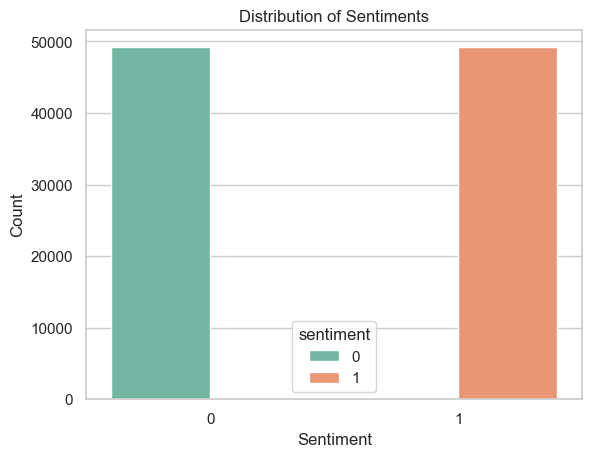

In [30]:
sns.set(style="whitegrid") 

sns.countplot(data=df, x='sentiment', hue='sentiment', palette='Set2')

# Customize plot labels and title if needed
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Show the plot
plt.show()

In [31]:
X_train_knn, X_temp_knn, y_train_knn, y_temp_knn = train_test_split(vectors, y, test_size=0.3, random_state=52)

X_validation_knn, X_test_knn, y_validation_knn, y_test_knn = train_test_split(X_temp_knn, y_temp_knn, test_size=0.5, random_state=52)

## KNN with PCA

In [32]:
n_components = 100  
svd = TruncatedSVD(n_components=n_components)
X_train_knn_pca = svd.fit_transform(X_train_knn)
X_validation_knn_pca = svd.transform(X_validation_knn)
X_test_knn_pca = svd.transform(X_test_knn)


knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train_knn_pca, y_train_knn)


y_pred_validation_knn = knn_model.predict(X_validation_knn_pca)
accuracy_validation_knn = accuracy_score(y_validation_knn, y_pred_validation_knn)
print(f"Accuracy on the validation set: {accuracy_validation_knn}")

y_pred_test_knn = knn_model.predict(X_test_knn_pca)
accuracy_test_knn = accuracy_score(y_test_knn, y_pred_test_knn)
print(f"Accuracy on the test set: {accuracy_test_knn}")

Accuracy on the validation set: 0.6592803415328319
Accuracy on the test set: 0.6425425221928577


In [33]:
l = int(np.sqrt(len(x)))
print(l)

313


## KNN without PCA

In [34]:
knn_classifier = KNeighborsClassifier(n_neighbors=l)  # You can experiment with different values of k
knn_classifier.fit(X_train_knn, y_train_knn)


knn_predictions_train =knn_classifier.predict(X_train_knn) 
knn_accuracy = accuracy_score(y_train_knn, knn_predictions_train)
print(f"KNN Accuracy: {knn_accuracy:.2f}")
print("KNN Classification Report:")
print(classification_report(y_train_knn, knn_predictions_train))

KNN Accuracy: 0.74
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.85      0.77     34502
           1       0.81      0.63      0.71     34364

    accuracy                           0.74     68866
   macro avg       0.75      0.74      0.74     68866
weighted avg       0.75      0.74      0.74     68866



In [35]:
knn_prediction_test = knn_classifier.predict(X_test_knn) 
knn_accuracy = accuracy_score(y_test_knn, knn_prediction_test)
print(f"KNN Accuracy: {knn_accuracy:.2f}")
print("KNN Classification Report:")
print(classification_report(y_test_knn, knn_prediction_test))

KNN Accuracy: 0.74
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.85      0.76      7324
           1       0.81      0.63      0.71      7433

    accuracy                           0.74     14757
   macro avg       0.75      0.74      0.74     14757
weighted avg       0.75      0.74      0.74     14757



In [ ]:
knn_predictions_validation =knn_classifier.predict(X_validation_knn) 
knn_accuracy = accuracy_score(y_validation_knn, knn_predictions_validation)
print(f"KNN Accuracy: {knn_accuracy:.2f}")
print("KNN Classification Report:")

print(classification_report(y_validation_knn, knn_predictions_validation))

In [ ]:
def metrics(y_train, y_train_pred, y_test, y_test_pred):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    cm_train = confusion_matrix(y_train, y_train_pred)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=None)
    disp_train.plot(ax=axes[0], cmap='Blues', values_format='d')
    axes[0].set_title('Training Confusion Matrix ')

    
    cm_test = confusion_matrix(y_test, y_test_pred)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=None)
    disp_test.plot(ax=axes[1], cmap='Blues', values_format='d')
    axes[1].set_title('Testing Confusion Matrix')

    plt.show()

## SVM ACCURACY

In [ ]:
metrics(y_train_svm,svm_predictions_train ,y_test_svm,svm_prediction_test)

## KNN ACCURACY

In [ ]:
metrics(y_train_knn,knn_predictions_train ,y_test_knn,knn_prediction_test)

## ROC Curve of KNN, SVM


In [ ]:
def plot_roc_curve(fpr, tpr, label, title):
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(label, auc(fpr, tpr)))


plt.figure(figsize=(10, 6))

# KNN
knn_probs = knn_classifier.predict_proba(X_test_knn)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test_knn, knn_probs)
plot_roc_curve(knn_fpr, knn_tpr, 'KNN', 'ROC Curve - KNN')

# SVM
svm_probs = classifier.predict_proba(X_test_svm)[:, 1]
svm_fpr, svm_tpr, _ = roc_curve(y_test_svm, svm_probs)
plot_roc_curve(svm_fpr, svm_tpr, 'SVM', 'ROC Curve - SVM')

# Plotting diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [ ]:
new_text = "i happy to hear that"
new_text_vector = vectorizer.transform([new_text])

prediction = classifier.predict(new_text_vector)

if prediction[0] == 1:
    print("positve user comment")
else:
    print("negative user comment")